In [1]:
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from IPython.display import display

Using TensorFlow backend.


In [2]:
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

In [3]:
def grab_image(img_path_base, index, numImages):
    #Desired image dimension (image will be square ie # by # pixels)
    imageDim = 100
    
    if (index<10):
        img_path = img_path_base+"000"+str(index)+"_model.png"
    elif (index<100 and index >=10):
        img_path = img_path_base+"00"+str(index)+"_model.png"
    elif (index<1000 and index>=100):
        img_path = img_path_base+"0"+str(index)+"_model.png"
    elif (index<10000 and index>=1000):
        img_path = img_path_base+str(index)+"_model.png"
        
    img = image.load_img(img_path, target_size=(imageDim, imageDim), color_mode = "grayscale")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

#Num of images to read in
numImages = 600
X = np.concatenate([grab_image('/home/atm4w/Project/Data/miscImgs/',i, numImages) for i in range(numImages)]) 
X /= 255.0

X.shape

(600, 100, 100, 1)

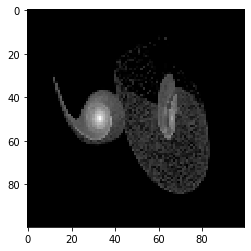

In [4]:
plt.imshow(image.array_to_img(X[45,:,:,:]), cmap='Greys_r')
plt.show()

In [5]:
Y = np.loadtxt('/home/atm4w/Project/Data/miscImgs/scores/humanScores.txt')
display(Y.shape)
display(Y[0:10])

(1294,)

array([0.945946, 0.941176, 0.918919, 0.916667, 0.916667, 0.914286,
       0.914286, 0.911765, 0.891892, 0.885714])

In [6]:
p = np.random.permutation(len(X))
Xshuffled = X[p]
Yshuffled = Y[p]

display(Xshuffled.shape)
display(Yshuffled.shape)

(600, 100, 100, 1)

(600,)

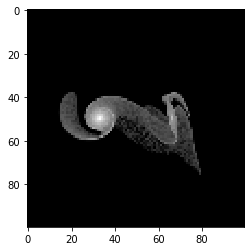

0.864865

In [7]:
plt.imshow(image.array_to_img(Xshuffled[0,:,:,:]), cmap='Greys_r')
plt.show()
display(Yshuffled[0])

In [8]:
x_train = Xshuffled[0:(round(numImages*.85)),:,:]
y_train = Yshuffled[0:(round(numImages*.85))]
x_test = Xshuffled[(round(numImages*.85)): , : , :]
y_test = Yshuffled[(round(numImages*.85)):]

display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(510, 100, 100, 1)

(510,)

(90, 100, 100, 1)

(90,)

In [53]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=(12, 12),
                activation='relu',
                input_shape=[x_test.shape[1],
                x_test.shape[2],
                x_test.shape[3]]))
model.add(keras.layers.Conv2D(16, kernel_size=(8, 8), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(4, 4)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(8, kernel_size=(4, 4), activation='relu'))
#model.add(keras.layers.Conv2D(16, kernel_size=(12, 12), activation='relu'))
#model.add(keras.layers.MaxPooling2D(pool_size=(4, 4)))
#model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(128, activation='relu'))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))


model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 89, 89, 16)        2320      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 82, 82, 16)        16400     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 20, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 17, 17, 8)         2056      
_________________________________________________________________
flatten_3 (Flatten)          (None, 2312)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [54]:
batch_size = 4
epochs = 120
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_split = 0.3)

Train on 357 samples, validate on 153 samples
Epoch 1/120
357/357 [==============================] - 15s 41ms/step - loss: 0.0708 - mse: 0.0708 - val_loss: 0.0537 - val_mse: 0.0537
Epoch 2/120
357/357 [==============================] - 12s 33ms/step - loss: 0.0503 - mse: 0.0503 - val_loss: 0.0543 - val_mse: 0.0543
Epoch 3/120
357/357 [==============================] - 11s 31ms/step - loss: 0.0508 - mse: 0.0508 - val_loss: 0.0538 - val_mse: 0.0538
Epoch 4/120
357/357 [==============================] - 14s 40ms/step - loss: 0.0500 - mse: 0.0500 - val_loss: 0.0541 - val_mse: 0.0541
Epoch 5/120
357/357 [==============================] - 15s 42ms/step - loss: 0.0504 - mse: 0.0504 - val_loss: 0.0538 - val_mse: 0.0538
Epoch 6/120
357/357 [==============================] - 15s 41ms/step - loss: 0.0503 - mse: 0.0503 - val_loss: 0.0537 - val_mse: 0.0537
Epoch 7/120
357/357 [==============================] - 14s 40ms/step - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0537 - val_mse: 0.0537
Epoch 8/1

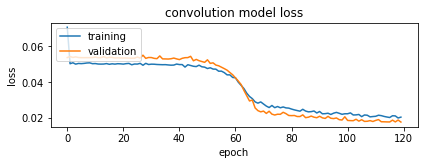

In [56]:
plt.figure()
# summarize history for accuracy
#plt.subplot(211)
#plt.plot(history.history['mean_squared_error'])
#plt.plot(history.history['val_mean_squared_error'])
#plt.title('model mean_squared_error')
#plt.ylabel('mean_squared_error')
#plt.xlabel('epoch')
#plt.legend(['training', 'validation'], loc='upper left')
#* summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('convolution model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [57]:
preds = model.predict(x_test)
diff = preds.flatten() - (y_test)
print("Mean difference")
print("---------------")
display(np.mean(np.abs(diff)))

Mean difference
---------------


0.11180336635142696

In [58]:
model.save("atm4wCurModel")

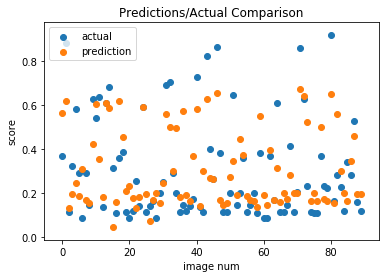

<Figure size 14400x1440 with 0 Axes>

In [59]:
#display(preds)
#display(y_test)
#display(diff)
#CHANGE THIS LINE TO BE DEPENDENT ON numIMAGES rather than hard coded
shuffledInd = np.linspace(0,89,num = 90)

plt.figure()
plt.scatter(shuffledInd, y_test)
plt.scatter(shuffledInd, preds)
plt.title("Predictions/Actual Comparison")
plt.ylabel("score")
plt.xlabel("image num")
plt.legend(['actual', 'prediction'], loc='upper left')
#plt.subplot(212)
#plt.scatter(y_test, preds)
#plt.title("Predicted vs Actual value")
#plt.ylabel("predicted value")
#plt.xlabel("actual value")
plt.figure(figsize=(200,20))
plt.show()

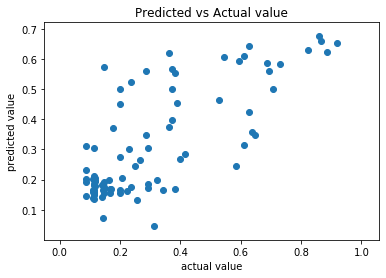

In [60]:
plt.figure()
plt.scatter(y_test, preds)
plt.title("Predicted vs Actual value")
plt.ylabel("predicted value")
plt.xlabel("actual value")
plt.axis('equal')
plt.show()

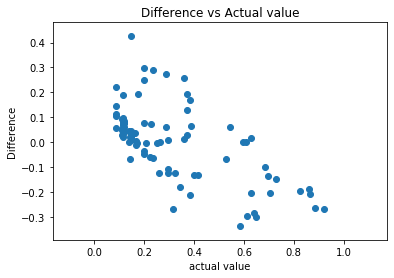

In [61]:
plt.figure()
plt.scatter(y_test, diff)
plt.title("Difference vs Actual value")
plt.ylabel("Difference")
plt.xlabel("actual value")
plt.axis('equal')
plt.show()

In [62]:
absDiff = np.abs(diff)

top10 = np.argpartition(absDiff, -10)[-10:]
bottom5= np.argpartition(absDiff, 5)[:5]
display(top10)
display(bottom5)
for i in range (10):
    print("Human Score")
    display(y_test[top10[i]])
    print("Prediction")
    display(preds[top10[i]][0])
    print("---------------")

array([80, 15, 82, 11, 73, 64, 51, 34,  4, 36])

array([70, 63, 13, 24, 45])

Human Score


0.918919

Prediction


0.65213263

---------------
Human Score


0.314286

Prediction


0.046813402

---------------
Human Score


0.285714

Prediction


0.5594058

---------------
Human Score


0.638889

Prediction


0.35624546

---------------
Human Score


0.235294

Prediction


0.5233394

---------------
Human Score


0.611111

Prediction


0.3148391

---------------
Human Score


0.648649

Prediction


0.3490901

---------------
Human Score


0.2

Prediction


0.4990552

---------------
Human Score


0.583333

Prediction


0.24541734

---------------
Human Score


0.147059

Prediction


0.5744496

---------------


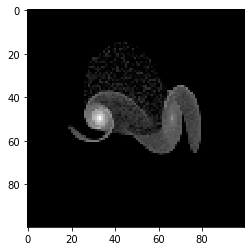

Human Score


0.918919

Prediction


0.65213263

In [63]:
plt.imshow(image.array_to_img(x_test[top10[0],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[0]])
print("Prediction")
display(preds[top10[0]][0])

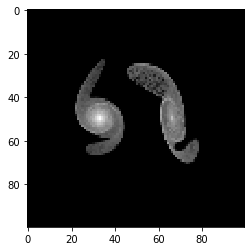

Human Score


0.314286

Prediction


0.046813402

In [64]:
plt.imshow(image.array_to_img(x_test[top10[1],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[1]])
print("Prediction")
display(preds[top10[1]][0])

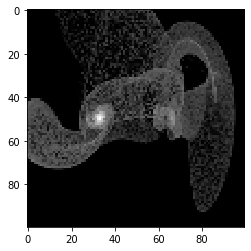

Human Score


0.285714

Prediction


0.5594058

In [65]:
plt.imshow(image.array_to_img(x_test[top10[2],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[2]])
print("Prediction")
display(preds[top10[2]][0])

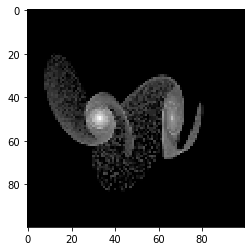

Human Score


0.638889

Prediction


0.35624546

In [66]:
plt.imshow(image.array_to_img(x_test[top10[3],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[3]])
print("Prediction")
display(preds[top10[3]][0])

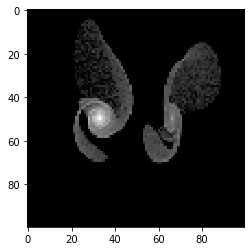

Human Score


0.235294

Prediction


0.5233394

In [67]:
plt.imshow(image.array_to_img(x_test[top10[4],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[4]])
print("Prediction")
display(preds[top10[4]][0])

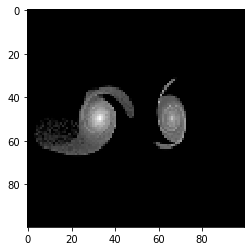

Human Score


0.611111

Prediction


0.3148391

In [68]:
plt.imshow(image.array_to_img(x_test[top10[5],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[5]])
print("Prediction")
display(preds[top10[5]][0])

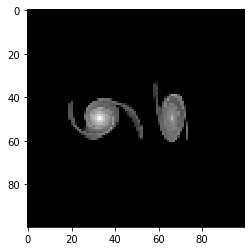

Human Score


0.648649

Prediction


0.3490901

In [69]:
plt.imshow(image.array_to_img(x_test[top10[6],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[6]])
print("Prediction")
display(preds[top10[6]][0])

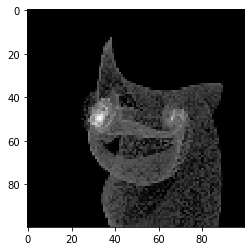

Human Score


0.2

Prediction


0.4990552

In [70]:
plt.imshow(image.array_to_img(x_test[top10[7],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[7]])
print("Prediction")
display(preds[top10[7]][0])

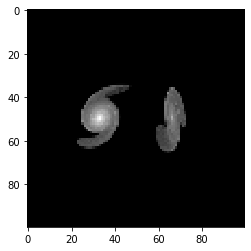

Human Score


0.583333

Prediction


0.24541734

In [71]:
plt.imshow(image.array_to_img(x_test[top10[8],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[8]])
print("Prediction")
display(preds[top10[8]][0])

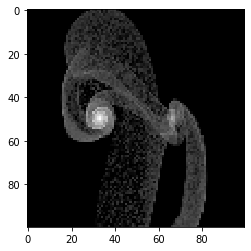

Human Score


0.147059

Prediction


0.5744496

In [72]:
plt.imshow(image.array_to_img(x_test[top10[9],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[9]])
print("Prediction")
display(preds[top10[9]][0])

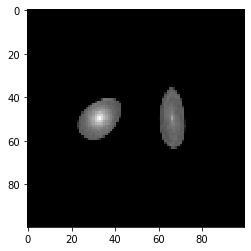

Human Score


0.205882

Prediction


0.20354782

In [73]:
plt.imshow(image.array_to_img(x_test[bottom5[0],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[0]])
print("Prediction")
display(preds[bottom5[0]][0])

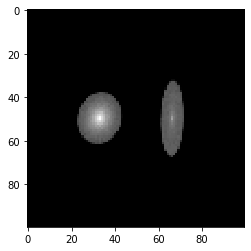

Human Score


0.171429

Prediction


0.16949412

In [74]:
plt.imshow(image.array_to_img(x_test[bottom5[1],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[1]])
print("Prediction")
display(preds[bottom5[1]][0])

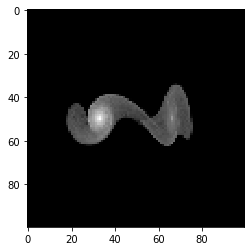

Human Score


0.609524

Prediction


0.6088861

In [75]:
plt.imshow(image.array_to_img(x_test[bottom5[2],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[2]])
print("Prediction")
display(preds[bottom5[2]][0])

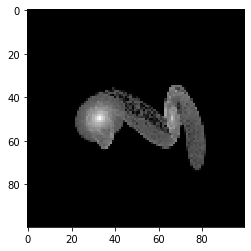

Human Score


0.594595

Prediction


0.59413564

In [76]:
plt.imshow(image.array_to_img(x_test[bottom5[3],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[3]])
print("Prediction")
display(preds[bottom5[3]][0])

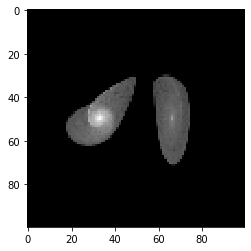

Human Score


0.264706

Prediction


0.26391497

In [77]:
plt.imshow(image.array_to_img(x_test[bottom5[4],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[4]])
print("Prediction")
display(preds[bottom5[4]][0])

In [78]:
maxPred = np.amax(preds, axis=0)
maxPredIndex = np.where(preds == maxPred)
display(maxPred[0])
display(maxPredIndex[0][0])

0.67435354

71

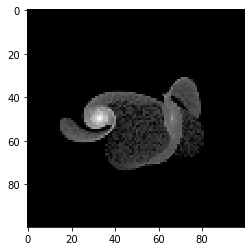

Human Score


0.861111

Prediction


0.67435354

In [79]:
plt.imshow(image.array_to_img(x_test[maxPredIndex[0][0],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[maxPredIndex[0][0]])
print("Prediction")
display(preds[maxPredIndex[0][0]][0])